In [7]:
# Inspired by: https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

from nba_api.stats.endpoints import shotchartdetail, commonteamroster
from nba_api.stats.static import teams
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [8]:
teams_list = teams.get_teams()
teams_dict = dict([(x['abbreviation'], None) for x in teams_list])
print([x['abbreviation'] for x in teams_list])

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [9]:
season = input('Type the season: ')

Type the season: 2021-22


In [10]:
def get_date_from_input(label):
    while True:
        date_text = input(label)
        try:
            return datetime.datetime.strptime(date_text, '%Y-%m-%d')
        except ValueError:
            print("Incorrect date format, should be YYYY-MM-DD")

In [11]:
start_date = get_date_from_input('Type the start date in the format YYYY-MM-DD: ')

Type the start date in the format YYYY-MM-DD511
Incorrect date format, should be YYYY-MM-DD
Type the start date in the format YYYY-MM-DD2022-01-01


In [12]:
end_date = get_date_from_input('Type the end date in the format YYYY-MM-DD: ')

Type the end date in the format YYYY-MM-DD2022-01-30


In [13]:
def get_team_id(abbreviation):
    results = [x['id'] for x in teams_list if x['abbreviation'] == abbreviation]
    if len(results) > 0:
        return results[0]
    return None

def get_team_roster(team_abbr):
    team_id = get_team_id(team_abbr)
    roster = commonteamroster.CommonTeamRoster(season=season, team_id=team_id)
    roster_loaded = json.loads(roster.get_json())
    headers = roster_loaded['resultSets'][0]['headers']
    rows = roster_loaded['resultSets'][0]['rowSet']
    roster_df = pd.DataFrame(rows, columns = headers)
    teams_dict[team_abbr] = roster_df
    print(headers)
    

def get_player_id(team_abbr, name = None):
    if teams_dict[team_abbr] is None:
        get_team_roster(team_abbr)
    roster_df = teams_dict[team_abbr]
    player_data = roster_df.loc[roster_df['PLAYER'] == name].iloc[0]
    return player_data['PLAYER_ID']

In [14]:
team_abbr = input("Type the abbreviation of the player's team: ")

Type the abbreviation of the player's team: PHI


In [15]:
player_name = input('Type the name of the player whose shots you want to see: ')

Type the name of the player whose shots you want to see: Joel Embiid


In [22]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id(team_abbr),
            player_id = get_player_id(team_abbr, player_name),
            context_measure_simple = 'PTS',
            season_nullable = season,
            season_type_all_star = 'Regular Season')

In [23]:
shot_json_loaded = json.loads(shot_json.get_json())

In [24]:
headers = shot_json_loaded['resultSets'][0]['headers']
rows = shot_json_loaded['resultSets'][0]['rowSet']
print(headers)

['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM']


In [26]:
player_data = pd.DataFrame(rows, columns = headers)
player_data['GAME_DATE'] = pd.to_datetime(player_data['GAME_DATE'])
player_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100009,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,42,...,Center(C),8-16 ft.,15,12,155,1,1,2021-10-20,NOP,PHI
1,Shot Chart Detail,0022100009,24,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,9,41,...,Center(C),24+ ft.,25,1,255,1,1,2021-10-20,NOP,PHI
2,Shot Chart Detail,0022100009,41,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,8,5,...,Right Side Center(RC),24+ ft.,24,180,159,1,1,2021-10-20,NOP,PHI
3,Shot Chart Detail,0022100009,43,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,7,22,...,Center(C),Less Than 8 ft.,2,22,8,1,1,2021-10-20,NOP,PHI
4,Shot Chart Detail,0022100009,311,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,0,39,...,Center(C),Less Than 8 ft.,2,-5,22,1,1,2021-10-20,NOP,PHI


In [29]:
player_data_filtered = player_data.loc[(player_data['GAME_DATE'] > start_date) & (player_data['GAME_DATE'] < end_date)]
player_data_filtered.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
143,Shot Chart Detail,0022100454,9,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,33,...,Center(C),Less Than 8 ft.,6,60,-19,1,1,2022-01-25,PHI,NOP
144,Shot Chart Detail,0022100454,22,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,10,5,...,Center(C),Less Than 8 ft.,0,0,0,1,1,2022-01-25,PHI,NOP
145,Shot Chart Detail,0022100454,60,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,6,4,...,Center(C),Less Than 8 ft.,1,-11,5,1,1,2022-01-25,PHI,NOP
146,Shot Chart Detail,0022100454,92,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,2,58,...,Center(C),Less Than 8 ft.,7,-71,-8,1,1,2022-01-25,PHI,NOP
147,Shot Chart Detail,0022100454,300,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,1,15,...,Center(C),Less Than 8 ft.,4,-20,36,1,1,2022-01-25,PHI,NOP


In [30]:
# Function to draw basketball court
def create_court(ax, color):
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    ax.text(0, 1.05, '{}\n{} Regular Season'.format(player_name, season), transform=ax.transAxes, ha='left', va='baseline')

    ax.hexbin(player_data_filtered['LOC_X'], player_data_filtered['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

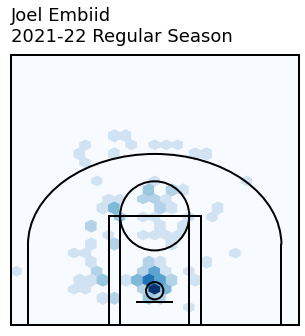

In [31]:
# General plot parameters
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

title = "{}-{}".format(player_name, season)    
plt.savefig(title + '.jpg', dpi=1000)

plt.show()